In [1]:
import pandas as pd
import numpy as np

In [2]:
#non stationary dataset
df1=pd.read_csv("./UDEMY_TSA_FINAL/Data/airline_passengers.csv",index_col="Month",parse_dates=True)
df1.index.freq="MS"

#stationary dataset
df2=pd.read_csv("./UDEMY_TSA_FINAL/Data/DailyTotalFemaleBirths.csv",index_col="Date",parse_dates=True)
df2.index.freq="D"

### Auto ARIMA

In [3]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [4]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [5]:
auto_arima(df2["Births"])

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [6]:
auto_arima(df2["Births"],error_action="ignore").summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Thu, 06 Jul 2023   AIC                           2459.074
Time:                        12:50:20   BIC                           2470.766
Sample:                    01-01-1959   HQIC                          2463.721
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### ARIMA 111 will be used with no seasaonal order component

In [7]:
stepwise_fit=auto_arima(df2["Births"],start_p=0,start_q=0,
                        max_p=6, max_q=3, m=12,
                        seasonal=False,
                        d=None, trace=True,
                        error_action="ignore",
                        suppress_warnings=True,
                        stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.59 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.83 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.59 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.41 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2463.068, Time=1.73 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [8]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Thu, 06 Jul 2023   AIC                           2459.074
Time:                        12:50:28   BIC                           2470.766
Sample:                    01-01-1959   HQIC                          2463.721
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### check the non-stationary data airline passengers

In [9]:
stepwise_fit=auto_arima(
    df1["Thousands of Passengers"],start_p=1,start_q=1,
    max_p=3,max_q=3,m=12,
    start_P=0, seasonal=True,
    d=None, D=1, trace=True,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=True
)

Performing stepwise search to minimize aic


 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.54 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.37 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.36 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=1.14 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.96 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.87 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.39 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.50 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.65 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.38 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.14 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.52 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.54 sec
 ARIM

In [10]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Thu, 06 Jul 2023   AIC                           1019.178
Time:                                     12:50:44   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Statmodels ARMA Order select

In [11]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [12]:
help(arma_order_select_ic)

Help on function arma_order_select_ic in module statsmodels.tsa.stattools:

arma_order_select_ic(y, max_ar=4, max_ma=2, ic='bic', trend='c', model_kw=None, fit_kw=None)
    Compute information criteria for many ARMA models.
    
    Parameters
    ----------
    y : array_like
        Array of time-series data.
    max_ar : int
        Maximum number of AR lags to use. Default 4.
    max_ma : int
        Maximum number of MA lags to use. Default 2.
    ic : str, list
        Information criteria to report. Either a single string or a list
        of different criteria is possible.
    trend : str
        The trend to use when fitting the ARMA models.
    model_kw : dict
        Keyword arguments to be passed to the ``ARMA`` model.
    fit_kw : dict
        Keyword arguments to be passed to ``ARMA.fit``.
    
    Returns
    -------
    Bunch
        Dict-like object with attribute access. Each ic is an attribute with a
        DataFrame for the results. The AR order used is the row ind

In [13]:
arma_order_select_ic(df2["Births"])

{'bic':              0            1            2
 0  2502.581666  2494.238838  2494.731532
 1  2490.780320  2484.505387  2486.223525
 2  2491.963247  2485.782753  2491.097242
 3  2496.498625  2491.061565  2493.581194
 4  2501.491895  2496.961059  2498.338499,
 'bic_min_order': (1, 1)}

In [14]:
arma_order_select_ic(df1["Thousands of Passengers"])

{'bic':              0            1            2
 0  1796.307208  1627.771970  1534.005397
 1  1437.089971  1421.627976  1425.900084
 2  1425.518054  1423.098854  1426.162440
 3  1425.192051  1426.106652  1430.921257
 4  1427.578303  1430.255550  1417.910293,
 'bic_min_order': (4, 2)}

# ARMA and ARIMA

In [15]:
import pandas as pd
import numpy as np

In [42]:
# loading forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMAResults,ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA


In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
df1=pd.read_csv("./UDEMY_TSA_FINAL/Data/DailyTotalFemaleBirths.csv",index_col="Date",parse_dates=True)
df1.index.freq="D"
df1=df1[:120] # only 4 months needed

df2=pd.read_csv("./UDEMY_TSA_FINAL/Data/TradeInventories.csv",index_col="Date",parse_dates=True)
df2.index.freq="MS"

### Dickey Fuller Test for stationary check

In [19]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=""):

    print(f"Augmented DF test {title}")
    result=adfuller(series.dropna(),autolag="AIC")

    labels=["ADF test statistic", "p-value", "# lags used", "# observations"]
    out=pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f"critical value ({key})"]=val

    print(out.to_string())

    if result[1] <=0.05:
        print("string evidence against the null hypothesis")
        print("reject tje null hypothesis")
        print("data has no unit root and is stationary")

    else:
        print("weak evidence against the null hypothesis")
        print("fail to reject the null hypothesis")
        print("data has a unit root and is non-stationary")

### ARMA model

<AxesSubplot:xlabel='Date'>

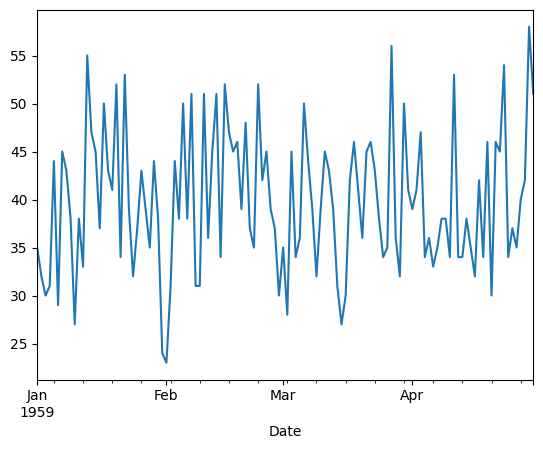

In [21]:
df1["Births"].plot()

In [24]:
adf_test(df1["Births"]) # the data is stationary

Augmented DF test 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
string evidence against the null hypothesis
reject tje null hypothesis
data has no unit root and is stationary


### ARIMA orders

In [32]:
auto_arima(df1["Births"],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Thu, 06 Jul 2023   AIC                            823.489
Time:                        13:06:25   BIC                            829.064
Sample:                    01-01-1959   HQIC                           825.753
                         - 04-30-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.36   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Split the data into train/test sets

In [33]:
train=df1.iloc[:90]
test=df1.iloc[90:]

In [34]:
# fitting ARMA model

In [45]:
model=ARIMA(train["Births"],order=(2,0,2))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -307.812
Date:                Thu, 06 Jul 2023   AIC                            627.625
Time:                        13:12:39   BIC                            642.624
Sample:                    01-01-1959   HQIC                           633.673
                         - 03-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7571      1.017     39.096      0.000      37.764      41.750
ar.L1         -0.4670      1.005     -0.465      0.642      -2.437       1.503
ar.L2          0.5071      0.942      0.538      0.590      -1.339       2.353
ma.L1          0.5631     13.679      0.041      0.967     -26.247      27.374
ma.L2         -0.4368      5.880     -0.074      0.941     -11.961      11.088
sigma2        54.3770    726.827      0.075      0.940   -1370.177    1478.931
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.00
Prob(Q):                              0.96   Prob(JB):                         0.37
Heteroskedasticity (H):               0.92   Skew:                             0.16
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
start=len(train)
end=len(train)+len(test)-1
predictions=results.predict(start=start,end=end).rename("ARMA(2,2) predictions")

<AxesSubplot:title={'center':'dailt total female birsts'}, xlabel='Date'>

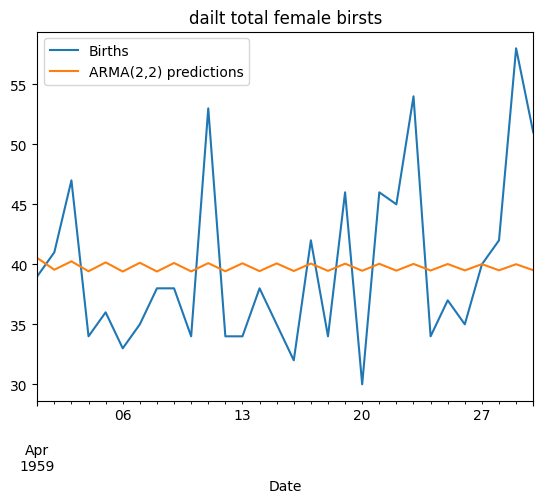

In [47]:
#plotting

title="dailt total female birsts"
ylabel="births"
xlabel="" 
ax=test["Births"].plot(legend=True,title=title)
predictions.plot(legend=True)

## ARIMA MODEL

[Text(0.5, 0, 'date'), Text(0, 0.5, 'chained 2012 dollars')]

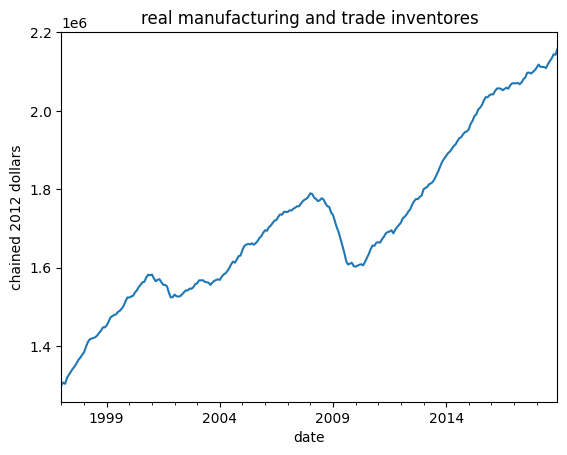

In [50]:
import matplotlib.ticker as ticker
formatter=ticker.StrMethodFormatter("{x:,.0F}")

title="real manufacturing and trade inventores"
ylabel="chained 2012 dollars"
xlabel="date"

ax=df2["Inventories"].plot(title=title)
ax.set(xlabel=xlabel,ylabel=ylabel)


#### ETS decomposition

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

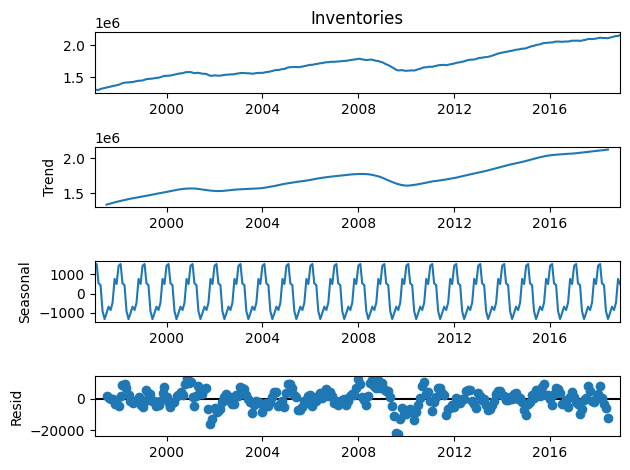

In [55]:
result=seasonal_decompose(df2["Inventories"],model="additive")
result.plot();

#### using inventories dataset

In [109]:
auto_arima(df2["Inventories"],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Thu, 06 Jul 2023   AIC                           5348.037
Time:                        16:06:38   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
auto_arima(df2['Inventories'], start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=True,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True
                      ).summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.837 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Thu, 06 Jul 2023   AIC                           5348.037
Time:                        14:38:18   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
# DF test

In [66]:
from statsmodels.tsa.statespace.tools import diff

In [67]:
df2["d1"]=diff(df2["Inventories"],k_diff=1)

adf_test(df2["d1"],"real manufactiing and trade inventories")

Augmented DF test real manufactiing and trade inventories
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
string evidence against the null hypothesis
reject tje null hypothesis
data has no unit root and is stationary


### ACF and PACF plots

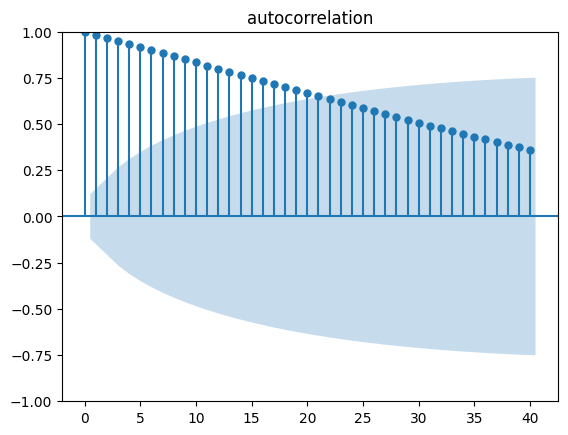

In [69]:
title="autocorrelation"
lags=40
plot_acf(df2["Inventories"],title=title,lags=lags);

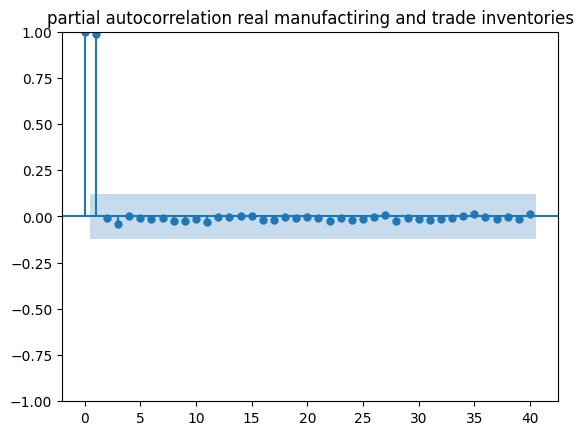

In [70]:
title="partial autocorrelation real manufactiring and trade inventories"
lags=40
plot_pacf(df2["Inventories"],title=title,lags=lags);

In [101]:
stepwise_fit = auto_arima(df2['Inventories'], start_p=1, start_q=1,
                          max_p=2, max_q=2, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.324 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Thu, 06 Jul 2023   AIC                           5348.037
Time:                        16:03:09   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
# TRAIN TEST SPLIT

In [73]:
train=df2.iloc[:252]
test=df2.iloc[252:]

#### ARIMA model fit

In [90]:
model=ARIMA(train["Inventories"],order=(1,1,1))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2552.901
Date:                Thu, 06 Jul 2023   AIC                           5111.801
Time:                        15:58:10   BIC                           5122.377
Sample:                    01-01-1997   HQIC                          5116.057
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.002    579.980      0.000       0.997       1.003
ma.L1         -0.9998      0.019    -51.601      0.000      -1.038      -0.962
sigma2      3.247e+07   1.54e-11   2.11e+18      0.000    3.25e+07    3.25e+07
===================================================================================
Ljung-Box (L1) (Q):                  87.24   Jarque-Bera (JB):               100.29
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -1.18
Prob(H) (two-sided):                  0.27   Kurtosis:                         5.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.8e+34. Standard errors may be unstable.
"""

In [91]:
#predicted values
start=len(train)
end=len(train)+len(test)-1
predictions=results.predict(start=start,end=end,dynamic=False,typ="levels").rename('ARIMA(1,1,1) Predictions')

In [92]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Inventories'][i]}")

predicted=2106714.583, expected=2110158
predicted=2109678.139, expected=2118199
predicted=2112641.668, expected=2112427
predicted=2115605.171, expected=2112276
predicted=2118568.647, expected=2111835
predicted=2121532.097, expected=2109298
predicted=2124495.52 , expected=2119618
predicted=2127458.916, expected=2127170
predicted=2130422.285, expected=2134172
predicted=2133385.628, expected=2144639
predicted=2136348.944, expected=2143001
predicted=2139312.234, expected=2158115


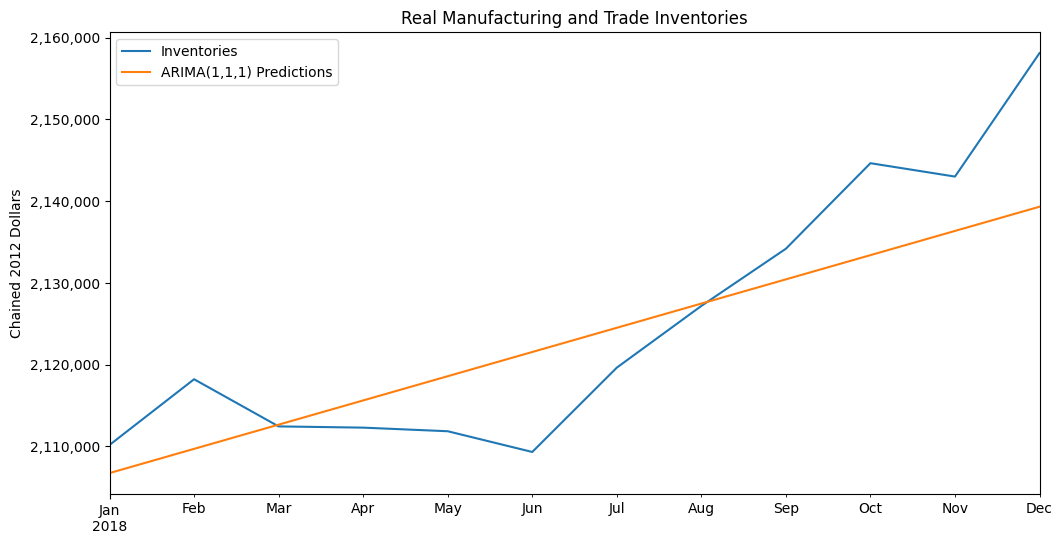

In [93]:
# Plot predictions against known values
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' # we don't really need a label here

ax = test['Inventories'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [95]:
# evaluate the model
from sklearn.metrics import mean_squared_error

In [96]:
error= mean_squared_error(test["Inventories"],predictions)
print(f"ARIMA 111 MSE ERROR {error}")

ARIMA 111 MSE ERROR 71081088.47584227


In [97]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Inventories'], predictions)
print(f'ARIMA(1,1,1) RMSE Error: {error:11.10}')

ARIMA(1,1,1) RMSE Error: 8430.960116


# ARIMA forecasting

In [118]:
model=ARIMA(df2["Inventories"],order=(1,1,1))
result=model.fit()
fcast=result.predict(len(df2),len(df2)+235,typ="levels").rename("ARIMA(1,1,1) Forecast")

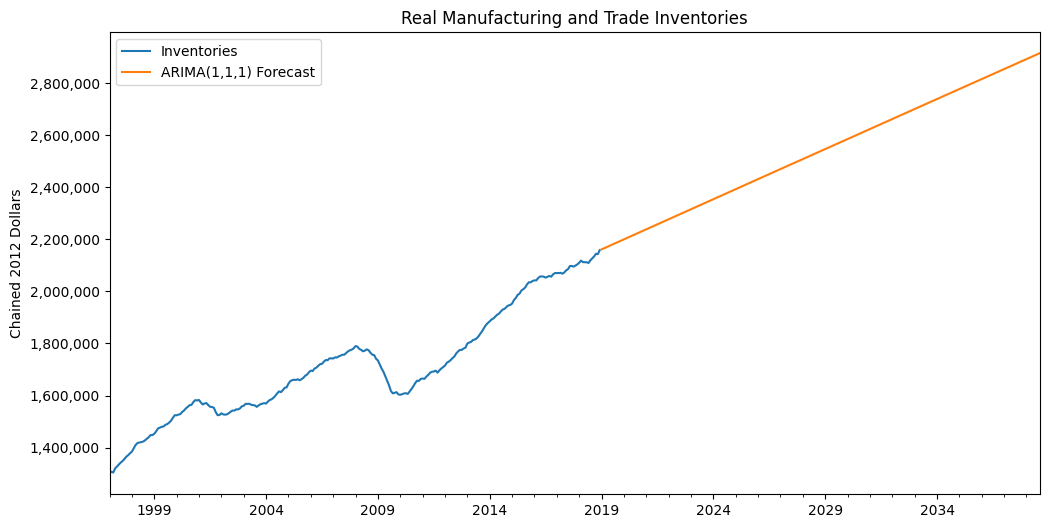

In [119]:
# Plot predictions against known values
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' # we don't really need a label here

ax = df2['Inventories'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);